In [40]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [31]:
from importlib import reload
import src.data
import cascade_failure.simple_cascade
import src.visualization
import src.atack
reload(cascade_failure.simple_cascade)
reload(src.data)
reload(src.visualization)
reload(src.atack)

from src.data import load_data_with_attributes
from src.visualization import draw_graph_after_failure
from cascade_failure.simple_cascade import cascade_failure_equal_load_distribution, cascade_failure_proportional_load_distribution
from src.atack import random_node_attack, high_degree_node_attack, high_load_capacity_ratio_node_attack, high_load_capacity_ratio_and_degree_node_attack
#from src.graph_utils import assign_atributes

In [60]:
#G(n, p)
n = 4941
p = 0.0005403026973346214
er_G = nx.erdos_renyi_graph(n, p)
pos = nx.spring_layout(er_G) 
nx.set_node_attributes(er_G, pos, "pos")
#nx.draw(er_G, node_size= 3)

In [47]:
#power_law
n=4941
m=1
p=0.0
powerlaw_G = nx.powerlaw_cluster_graph(n, m, p, seed=None, create_using=None)
pos = nx.spring_layout(powerlaw_G) 
nx.set_node_attributes(powerlaw_G, pos, "pos")
#nx.draw(powerlaw_G, node_size= 3)

In [67]:
#lognormal

n = 4941
mu = 0.8020674655391538
sigma = 0.5882423588404345

degree_sequence = np.random.lognormal(mean=mu, sigma=sigma, size=n).astype(int)
degree_sequence[degree_sequence < 1] = 1

lognormal_G = nx.configuration_model(degree_sequence)
lognormal_G = nx.Graph(lognormal_G)
lognormal_G.remove_edges_from(nx.selfloop_edges(lognormal_G))

pos = nx.spring_layout(lognormal_G) 
nx.set_node_attributes(lognormal_G, pos, "pos")

#nx.draw(G, node_size=3)

In [89]:
def assign_attributes(G):    
    for n in G.nodes():
        # capacity based on degree
        G.nodes[n]["capacity"] = G.degree[n] * random.uniform(10, 50)
        if G.nodes[n]["capacity"] == 0: 
            G.nodes[n]["capacity"] = 1e-6
        # initial load between 10% and 80% of capacity
        G.nodes[n]["load"] = G.nodes[n]["capacity"] * random.uniform(0.1, 0.75)
        # all nodes start as operational
        G.nodes[n]["failed"] = False
    return G

Power-law network

In [79]:
#random attack
def random_attack_on_generated_network(G, number_of_nodes):
    loaded_G = assign_attributes(G)
    attacked_nodes = random_node_attack(loaded_G, number_of_nodes)
    G_after_failure = cascade_failure_equal_load_distribution(loaded_G, attacked_nodes)
    draw_graph_after_failure(G_after_failure, title="Graph After Cascade Failure")
    print("Number of failed nodes:", sum(1 for n in G_after_failure.nodes() if G_after_failure.nodes[n]["failed"]))
    print("Number of intact nodes:", sum(1 for n in G_after_failure.nodes() if not G_after_failure.nodes[n]["failed"]))

#high degree node attack
def high_degree_attack_on_generated_network(G, number_of_nodes):
    loaded_G = assign_attributes(G)
    attacked_nodes = high_degree_node_attack(loaded_G, number_of_nodes)
    G_after_failure = cascade_failure_equal_load_distribution(loaded_G, attacked_nodes)
    draw_graph_after_failure(G_after_failure, title="Graph After Cascade Failure")
    print("Number of failed nodes:", sum(1 for n in G_after_failure.nodes() if G_after_failure.nodes[n]["failed"]))
    print("Number of intact nodes:", sum(1 for n in G_after_failure.nodes() if not G_after_failure.nodes[n]["failed"]))

def high_load_capacity_ratio_node_attack_on_generated_network(G, number_of_nodes):
    loaded_G = assign_attributes(G)
    attacked_nodes = high_load_capacity_ratio_node_attack(loaded_G, number_of_nodes)
    G_after_failure = cascade_failure_equal_load_distribution(loaded_G, attacked_nodes)
    draw_graph_after_failure(G_after_failure, title="Graph After Cascade Failure")
    print("Number of failed nodes:", sum(1 for n in G_after_failure.nodes() if G_after_failure.nodes[n]["failed"]))
    print("Number of intact nodes:", sum(1 for n in G_after_failure.nodes() if not G_after_failure.nodes[n]["failed"]))

def high_load_capacity_ratio_and_degree_node_attack_on_generated_network(G, number_of_nodes):
    loaded_G = assign_attributes(G)
    attacked_nodes = high_load_capacity_ratio_and_degree_node_attack(loaded_G, number_of_nodes)
    G_after_failure = cascade_failure_equal_load_distribution(loaded_G, attacked_nodes)
    draw_graph_after_failure(G_after_failure, title="Graph After Cascade Failure")
    print("Number of failed nodes:", sum(1 for n in G_after_failure.nodes() if G_after_failure.nodes[n]["failed"]))
    print("Number of intact nodes:", sum(1 for n in G_after_failure.nodes() if not G_after_failure.nodes[n]["failed"]))






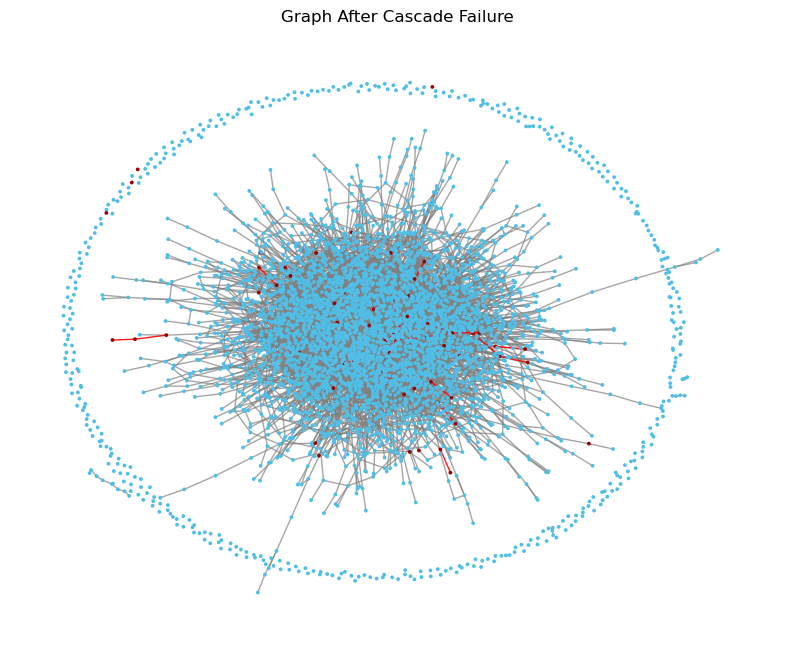

Number of failed nodes: 65
Number of intact nodes: 4876


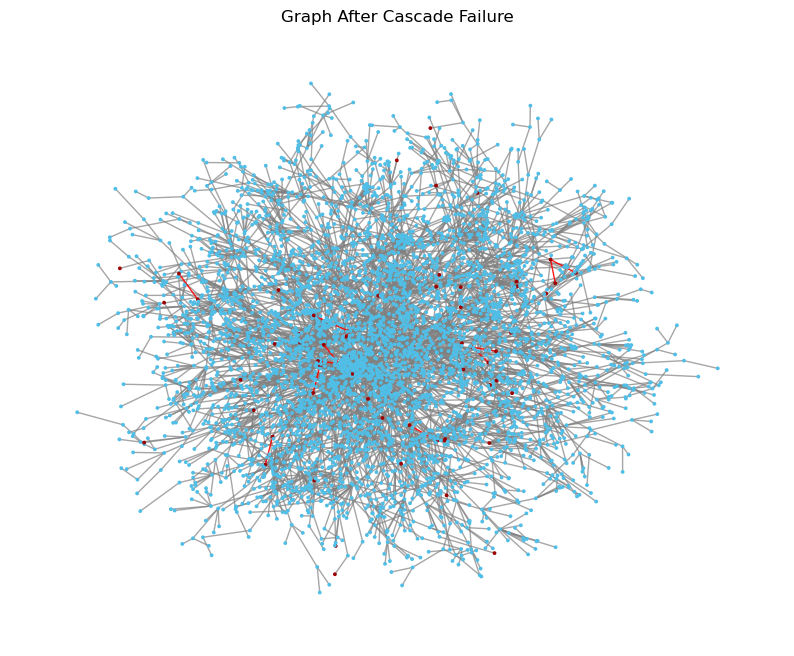

Number of failed nodes: 63
Number of intact nodes: 4878


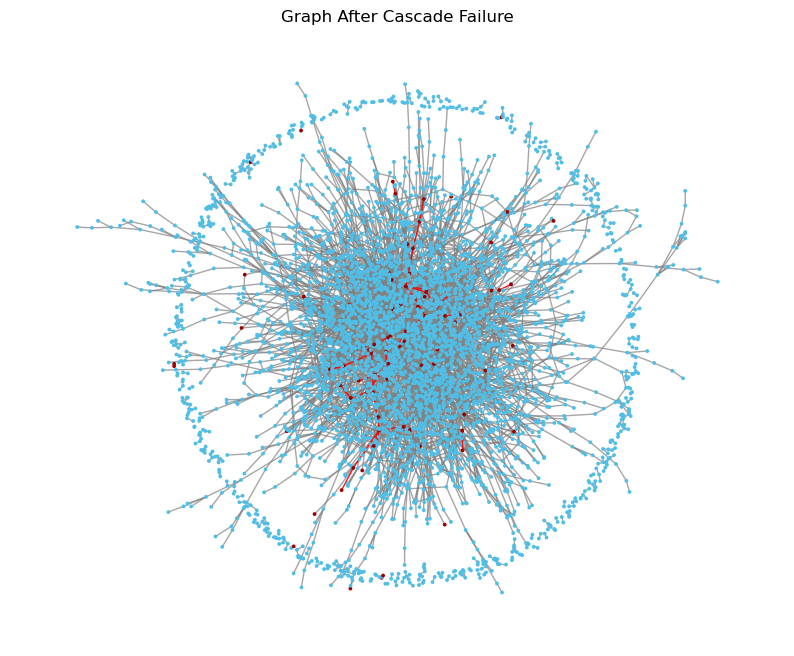

Number of failed nodes: 86
Number of intact nodes: 4855


In [77]:
number_of_nodes = 50
random_attack_on_generated_network(er_G, number_of_nodes)
random_attack_on_generated_network(powerlaw_G, number_of_nodes)
random_attack_on_generated_network(lognormal_G, number_of_nodes)

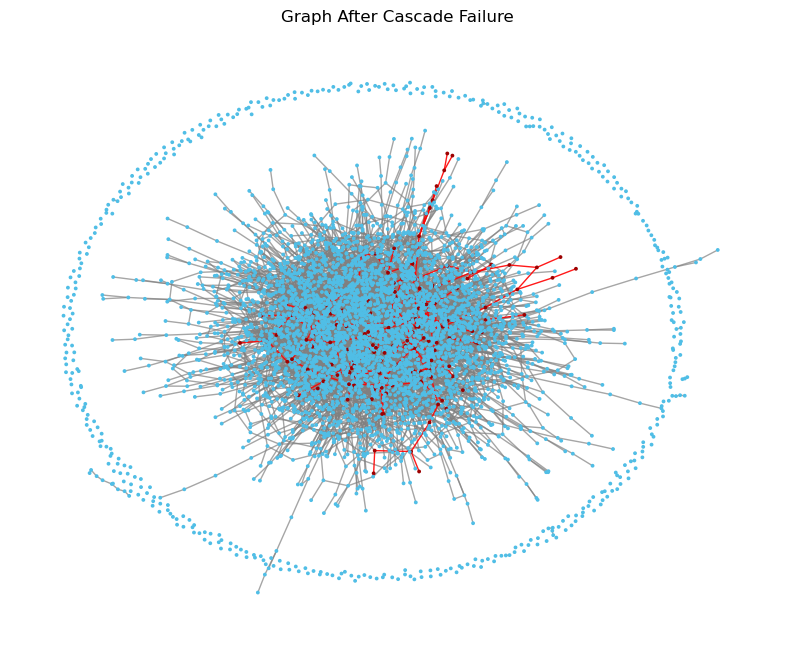

Number of failed nodes: 147
Number of intact nodes: 4794


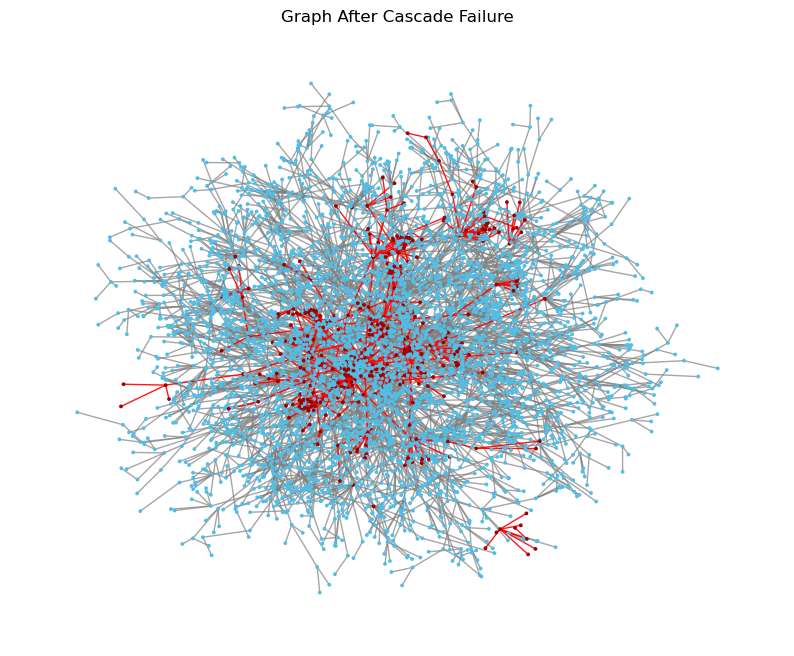

Number of failed nodes: 399
Number of intact nodes: 4542


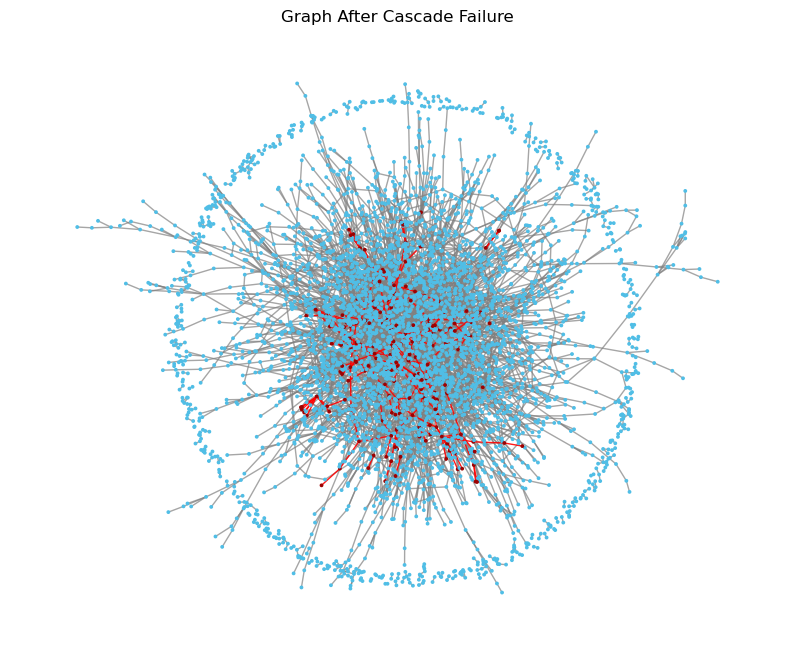

Number of failed nodes: 182
Number of intact nodes: 4759


In [78]:
number_of_nodes = 50
high_degree_attack_on_generated_network(er_G, number_of_nodes)
high_degree_attack_on_generated_network(powerlaw_G, number_of_nodes)
high_degree_attack_on_generated_network(lognormal_G, number_of_nodes)


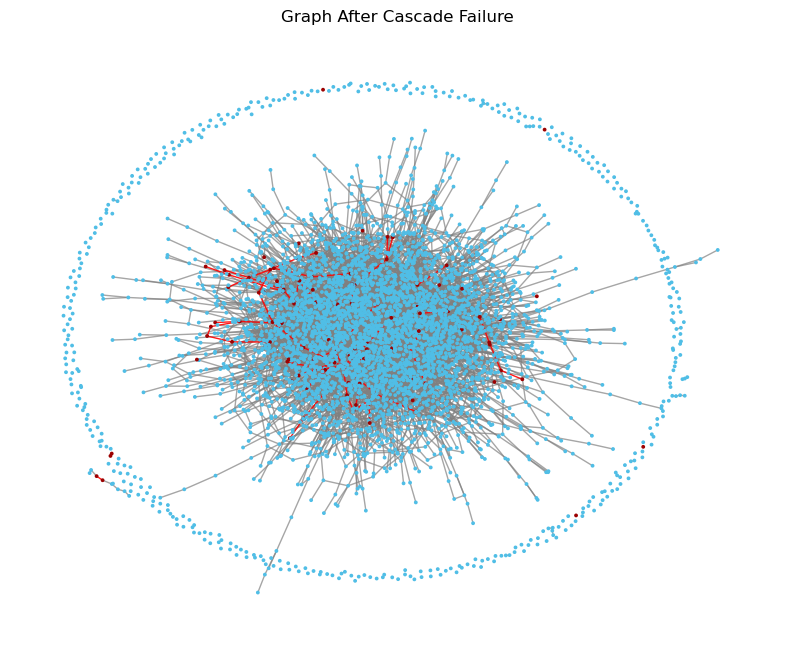

Number of failed nodes: 106
Number of intact nodes: 4835


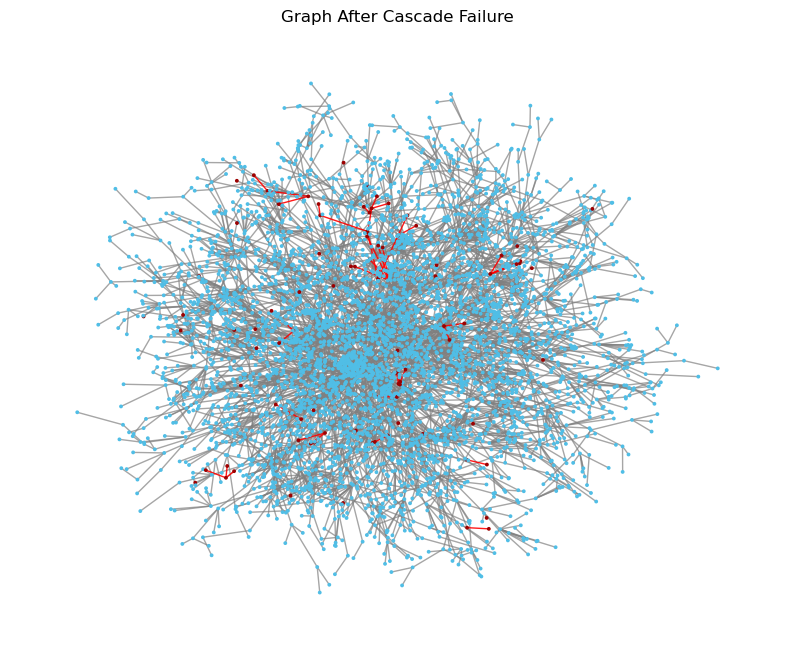

Number of failed nodes: 91
Number of intact nodes: 4850


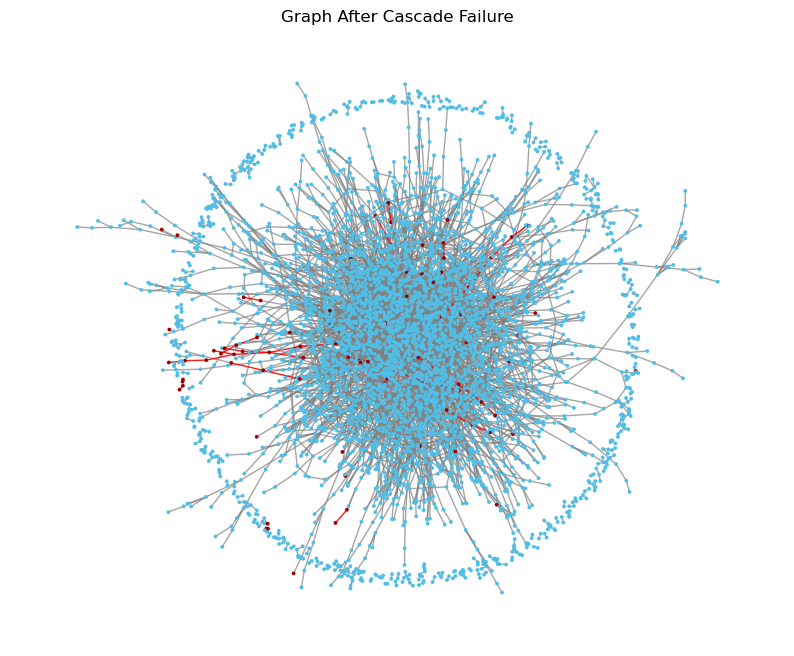

Number of failed nodes: 85
Number of intact nodes: 4856


In [90]:
number_of_nodes = 50
high_load_capacity_ratio_node_attack_on_generated_network(er_G, number_of_nodes)
high_load_capacity_ratio_node_attack_on_generated_network(powerlaw_G, number_of_nodes)
high_load_capacity_ratio_node_attack_on_generated_network(lognormal_G, number_of_nodes)

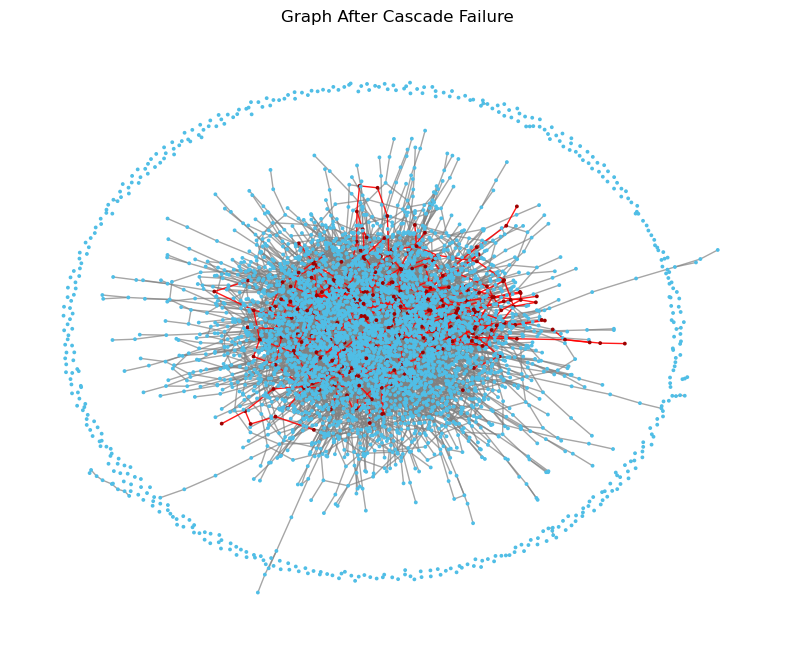

Number of failed nodes: 259
Number of intact nodes: 4682


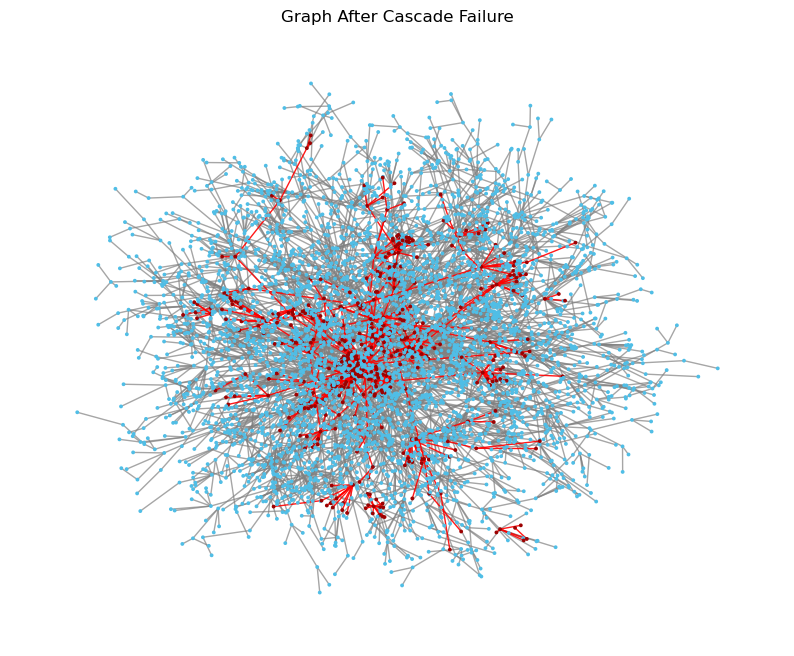

Number of failed nodes: 481
Number of intact nodes: 4460


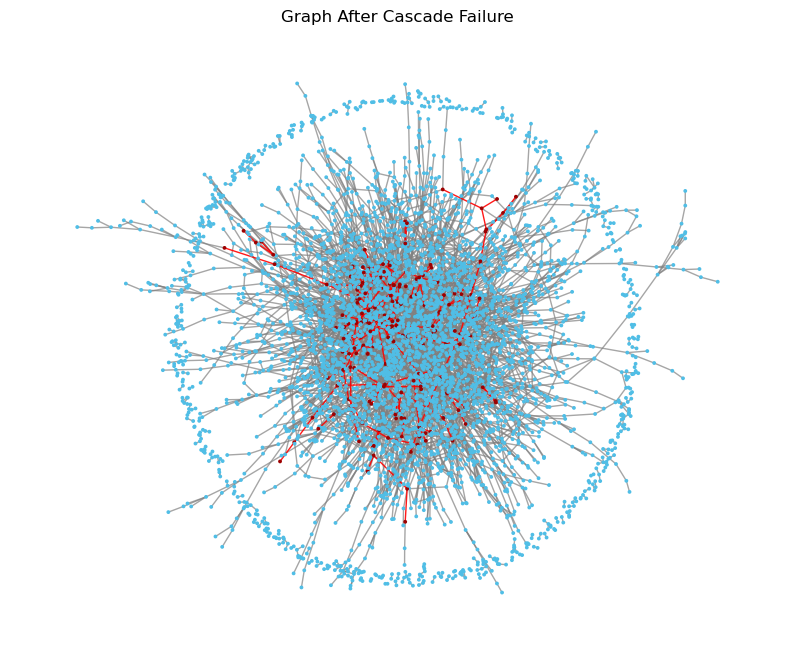

Number of failed nodes: 187
Number of intact nodes: 4754


In [91]:
number_of_nodes = 50
high_load_capacity_ratio_and_degree_node_attack_on_generated_network(er_G, number_of_nodes)
high_load_capacity_ratio_and_degree_node_attack_on_generated_network(powerlaw_G, number_of_nodes)
high_load_capacity_ratio_and_degree_node_attack_on_generated_network(lognormal_G, number_of_nodes)